# Post Clustering Analysis Starter Notebook

## 1. Library Prerequisites

In [1]:
# Essential Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Data Preprocessing

In [2]:
labels_df = pd.read_csv('data/Final_Revised_Dataset_With_Labels.csv')

In [3]:
df = pd.read_csv('data/Final_Draft_Dataset.csv')
df = df.rename(columns={'Unnamed: 0': 'Stock'})
df['Labels'] = labels_df['labels']

In [7]:
df.to_csv('scratch_dir/Final_Dataset_With_Labels.csv', index=False)

## 3. Cluster Dataset to Analyze

In [72]:
# Change the cluster variable to your assigned cluster to analyze

cluster = 2

cluster_df = df.copy()
cluster_df = cluster_df[cluster_df['Labels'] == cluster]
cluster_df.columns = cluster_df.columns.str.replace('Seasonality_', '')

cluster_df

,Stock,Returns,Volatility,P/E ratio,MoM_February,MoM_March,MoM_April,MoM_May,MoM_June,MoM_July,...,Average_MA_20_Q4_2022,Average_MA_20_Q1_2023,Average_MA_20_Q2_2023,Average_MA_20_Q3_2023,Average_MA_20_Q4_2023,Average_MA_20_Q1_2024,Average_MA_20_Q2_2024,Average_MA_20_Q3_2024,Average_MA_20_Q4_2024,Labels
0,AC,-0.016715,0.304282,8.985726,-0.009999,-0.058862,-0.044983,-0.029183,0.023546,-0.037687,...,644.609515,673.578032,638.596609,604.454224,618.453887,679.540602,601.308559,594.402525,673.787089,2
2,AEV,0.051135,0.354283,12.114948,-0.024365,-0.009179,-0.059071,-0.046277,-0.040172,-0.011282,...,50.879698,50.582008,49.663664,47.464827,44.605831,44.832534,38.758455,34.081335,33.893940,2
3,AGI,0.019598,0.303760,2.881266,0.025988,-0.032396,-0.044755,-0.004781,-0.074188,-0.023911,...,8.794565,11.982717,12.714692,12.398354,10.831536,10.813018,9.471187,8.773318,9.079592,2
4,ALI,-0.008708,0.354750,11.838829,0.016611,-0.049436,-0.062949,-0.070988,0.047188,-0.018764,...,25.495138,28.501691,25.692380,26.077227,28.429219,33.075556,28.391136,30.628882,32.445347,2
5,AREIT,0.108493,0.261918,15.318954,0.006158,-0.014113,-0.047510,-0.036402,-0.013199,0.014104,...,28.810198,30.803822,29.628603,30.271244,29.276908,31.353132,32.209418,35.511726,37.761211,2
11,CNVRG,0.053632,0.463947,12.884107,-0.071019,-0.049733,0.007297,-0.075339,0.048949,-0.018816,...,13.432972,15.957565,11.525401,9.364757,8.517567,8.805904,9.250342,12.202486,16.011788,2
18,JGS,-0.202035,0.405981,10.121147,-0.006482,-0.021215,-0.085795,-0.021594,0.057208,-0.042855,...,43.948399,51.897009,48.905197,41.183975,37.593609,39.165669,32.227579,26.012857,24.511738,2
19,LTG,0.081228,0.226041,4.553224,0.022945,-0.004198,0.007227,0.013160,-0.004329,-0.029416,...,6.230697,7.566166,7.787381,7.602279,7.470350,8.073786,8.877198,9.027597,9.641121,2
23,PGOLD,0.019604,0.281949,8.460580,-0.039682,-0.040645,-0.000373,-0.029765,0.051504,-0.010569,...,27.412610,29.898738,28.579637,25.837026,25.457271,25.724804,23.196662,25.539239,30.347061,2
25,SM,0.031716,0.295055,12.746224,-0.010170,0.007885,-0.009459,-0.018973,0.004770,0.002864,...,807.693099,878.057135,884.838018,864.988858,807.710659,886.676629,902.044339,879.477039,925.690339,2


## 4. Example Spider Plot

### Spider Plot Function

In [57]:
def make_spider_chart(df, group_column, features, title):

  df_agg = df.groupby(group_column)[features].mean().reset_index()

  for index, row in df_agg.iterrows():
    group_name = row[group_column]
    values = row[features].tolist()
    features_labels = features

    values += values[:1]
    features_labels += features_labels[:1]

    fig, ax = plt.subplots(figsize=(6, 10), subplot_kw=dict(polar=True))

    theta = np.linspace(0, 2*np.pi, len(values), endpoint=True)

    ax.plot(theta, values, marker='o', linestyle='-', label=group_name)
    ax.fill(theta, values, alpha=0.25)
    ax.set_thetagrids(theta * 180/np.pi, features_labels)
    ax.grid(True)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    ax.set_title(f'{title} - Cluster {cluster}')
    plt.show()

### Spider Plot Initiation

In [80]:
features_list = cluster_df.columns.to_list()
features_list = features_list[1:-1]

seasonality_features = list()

for i in features_list:
    if 'MoM' in i:
        seasonality_features.append(i)

seasonality_features

cluster_df.groupby('Labels')[seasonality_features].mean()


,MoM_February,MoM_March,MoM_April,MoM_May,MoM_June,MoM_July,MoM_August,MoM_September,MoM_October,MoM_November,MoM_December
Labels,,,,,,,,,,,
2,-0.004923,-0.027037,-0.032853,-0.024477,0.012311,-0.013609,0.005054,0.016014,-0.010281,0.003813,0.01156


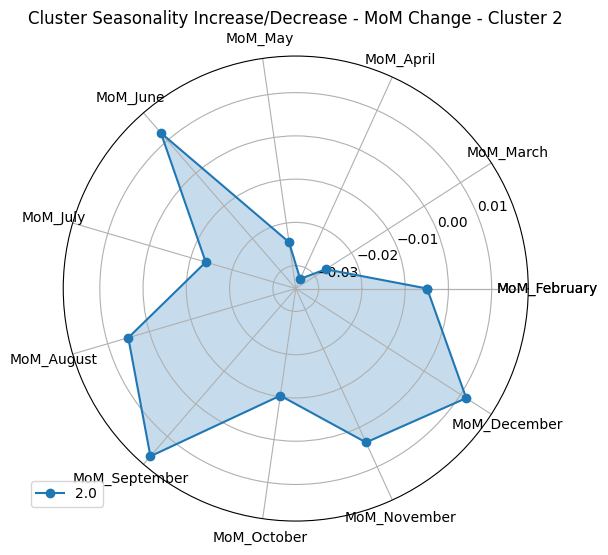

In [81]:
make_spider_chart(cluster_df, 'Labels' ,seasonality_features,  'Cluster Seasonality Increase/Decrease - MoM Change')